## Titanic 1 , 2 and 3 

In [2]:
#import required libraries
import numpy as np
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data from the “train.csv” file into a DataFrame.
df = pd.read_csv("train.csv")

In [4]:
# Display the dimensions of the file 
df.shape

(891, 12)

In [5]:
# Display the first 5 rows of data 
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Display type of variables are in the table 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Generate descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Generate descriptove statistics. Limit result to strings
df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnston, Miss. Catherine Helen ""Carrie""",male,1601,G6,S
freq,1,577,7,4,644


### Data Visualization


In [9]:
# import visulization packages
import matplotlib.pyplot as plt


In [10]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)


In [11]:
# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']


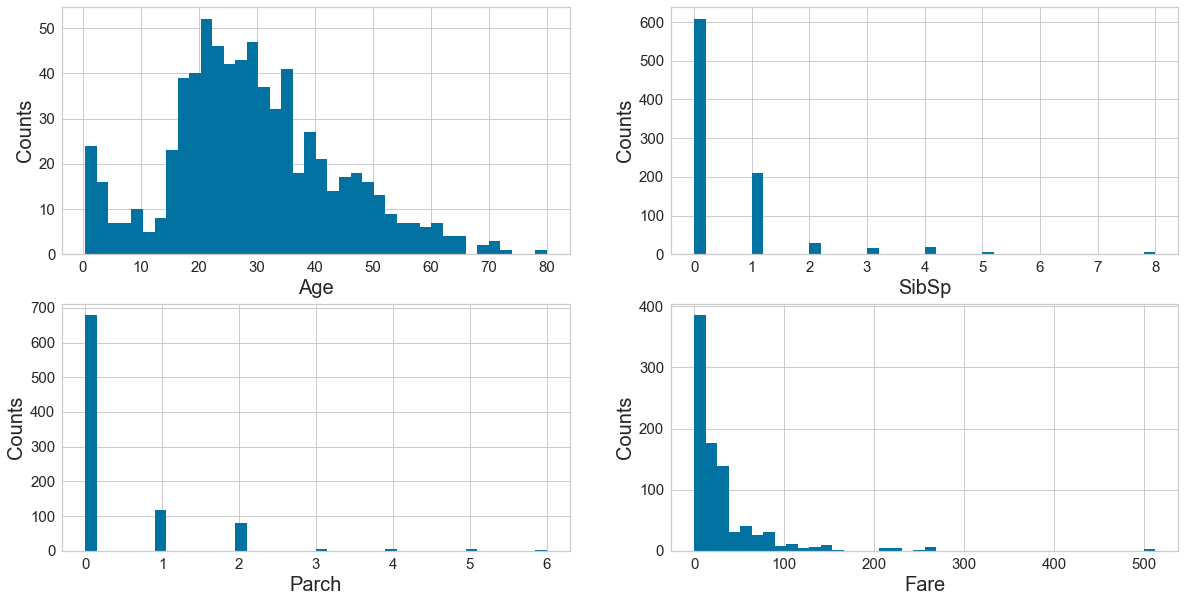

In [12]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()


In [13]:
# Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)


In [14]:
# make the survived data read to feed into the visulizer
X_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the Pclass data read to feed into the visulizer
X_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make the Sex data read to feed into the visulizer
X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

# make the Embarked data read to feed into the visualizer
X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']


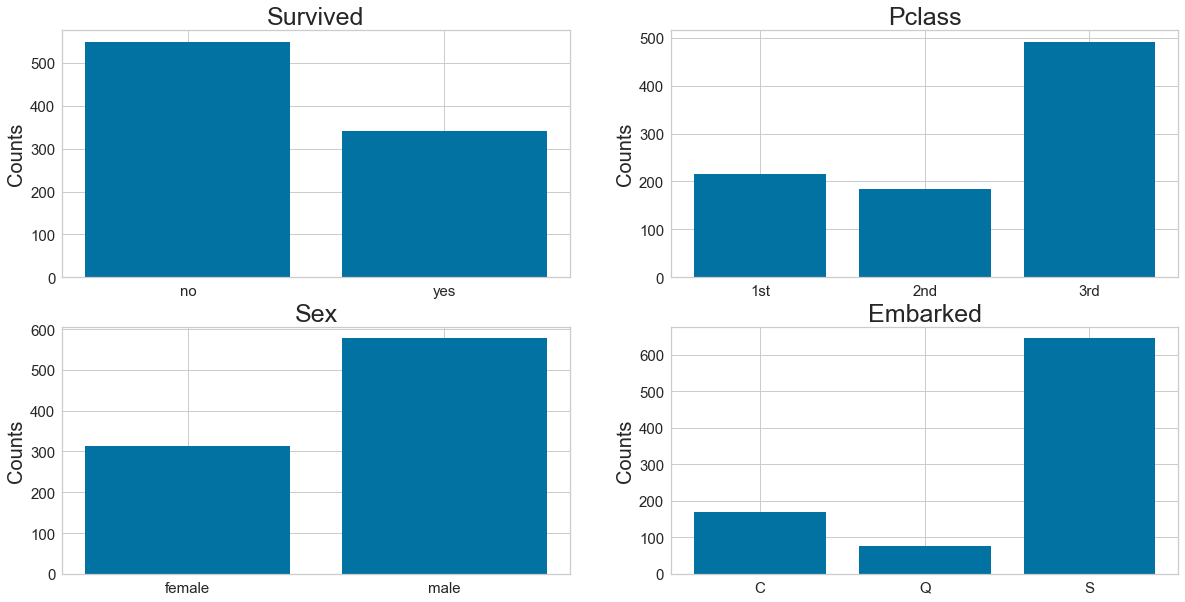

In [15]:

# make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the bar plot for - Survived variable
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the bar plot for - PClass variable
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


# make the bar plot for - Sex Variable
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# make the bar plot for - Embarked variable
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show();

### Pearsons Ranking

In [16]:
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)


In [17]:
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D


In [18]:
# extract the numpy arrays from the data frame
X = df[num_features].values

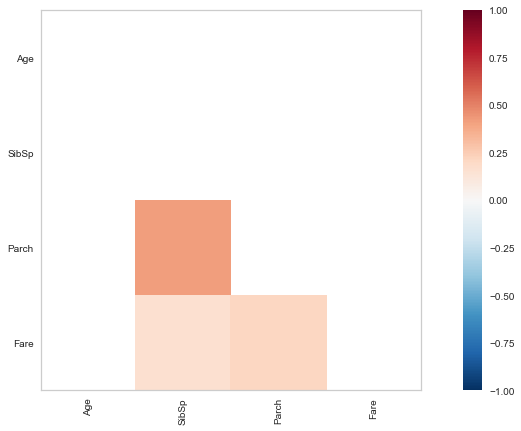

In [19]:
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data
plt.show()


In [20]:
# Compare variables of Survived vs Not Survived
#set up the figure size

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50



In [21]:
# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')


In [22]:
# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']


In [23]:
# copy data to a new dataframe
data_norm = df.copy()


In [24]:
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))


In [25]:
# Extract the numpy arrays from the data frame

X = data_norm[num_features].values
y = df.Survived.values


In [26]:
# Instantiate the visualizer

visualizer = ParallelCoordinates(classes=classes, features=num_features)

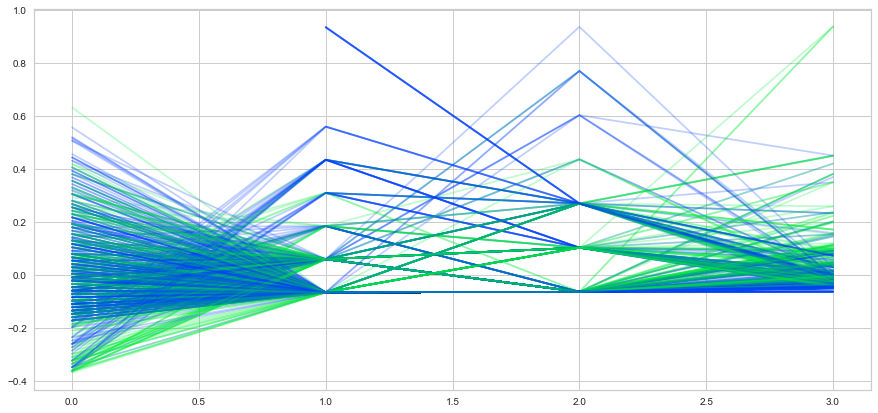

In [27]:
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

### Stacked bar charts to compare survived/not survived

In [28]:
#set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)


In [29]:
# make the data read to feed into the visulizer - sex variable - Survived vs not-survived

Sex_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)


# make the data read to feed into the visualizer -  Pclass Variable
Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)


# make the data read to feed into the visualizer - Embarked variable
Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

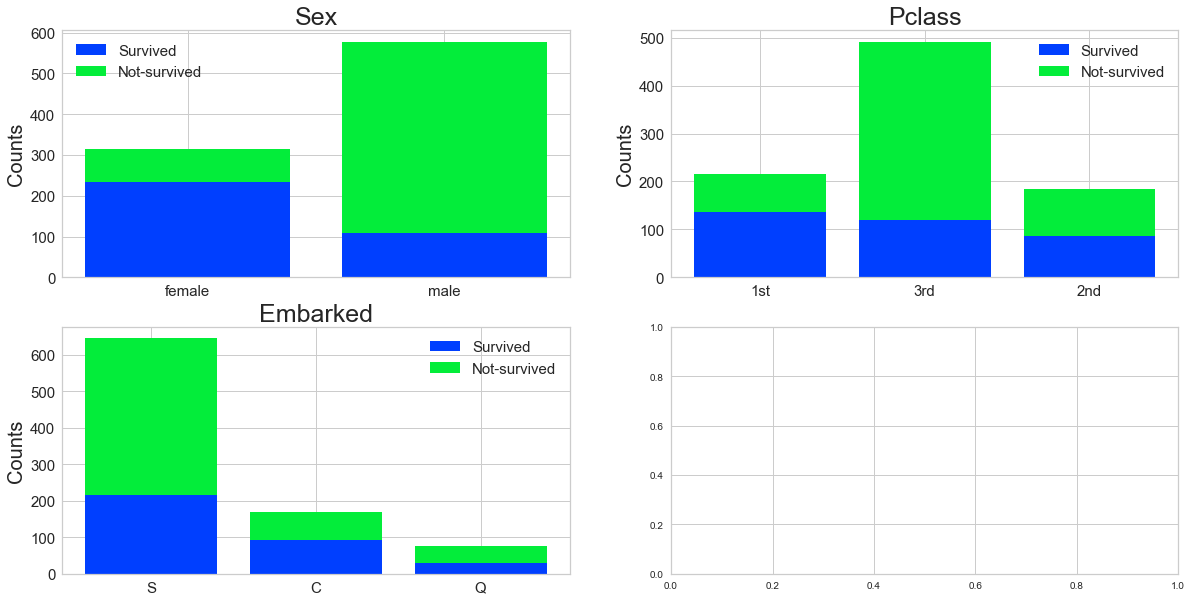

In [30]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)


# make the bar plot - Sex variable
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the bar plot - PClass variable
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)


# make the bar plot - EMbarked variable
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show();


### Titanic Tutorial Part 2



In [31]:
# import required libraries

import pandas as pd
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# load the titanic datasset

df = pd.read_csv('train.csv')

In [33]:
# view the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Fill in missing values and eliminate features

In [34]:
#fill the missing Fare data with median value
def fill_na_median(df, inplace=True):
    return df.fillna(df.median(), inplace=inplace)
fill_na_median(df['Age'])

In [35]:
# check above result
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
# fill with the most represented value
def fill_na_most(df, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])


In [37]:
# check the result
print(df['Embarked'].describe())


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [38]:
# log-transformation
def log_transformation(df):
    return df.apply(np.log1p)
df['Fare_log1p'] = log_transformation(df['Fare'])

In [39]:
# check the data
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


### Adjust skewed data (fare)

In [40]:
#check the distribution using histogram
# set up the figure size

plt.rcParams['figure.figsize'] = (10, 5)


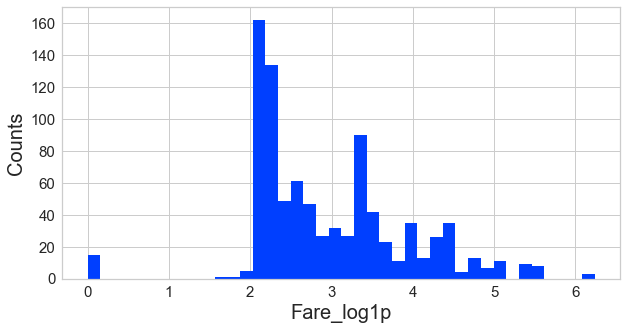

In [41]:
plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()


### Convert categorical data to numbers

In [42]:
# Retrieve the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})


In [43]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

In [44]:
# check the data
data_cat_dummies.head(8)

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1


# Titanic 3

### Train and validation data splitting


In [45]:
# Combine the numerical features and the dummie features together
#features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
#data_model_X = pd.concat([df[features_model], data_cat_dummies], axis=1)

features_model = ['Age','Sibsp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([df[numeric_model],data_cat_dummies], axis = 1)

In [46]:
# create a whole target dataset that can be used for train and validation data splitting
#data_model_y = df.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
data_model_y = df.Survived

In [47]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split


In [48]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [56]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
0    373
1    250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
0    176
1     92
Name: Survived, dtype: int64


In [50]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


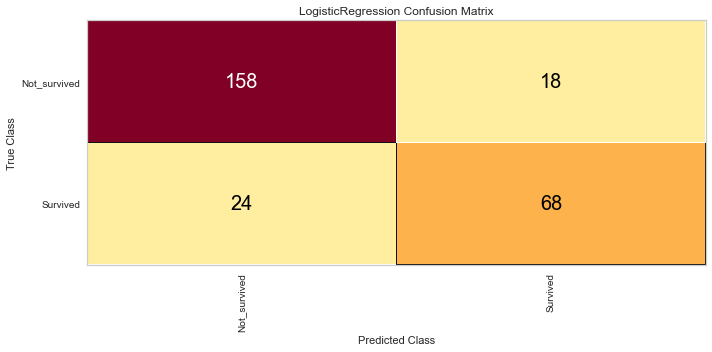

In [51]:
import warnings
warnings.filterwarnings("ignore")

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()
plt.show()

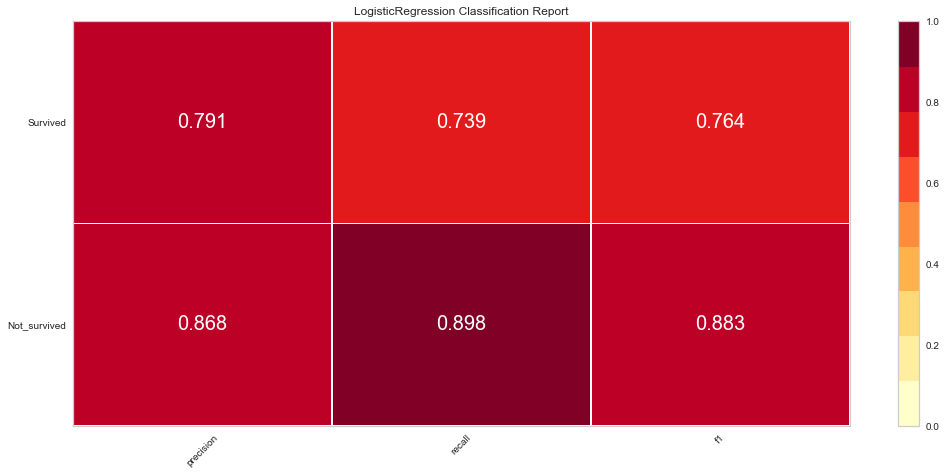

In [52]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


In [53]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)


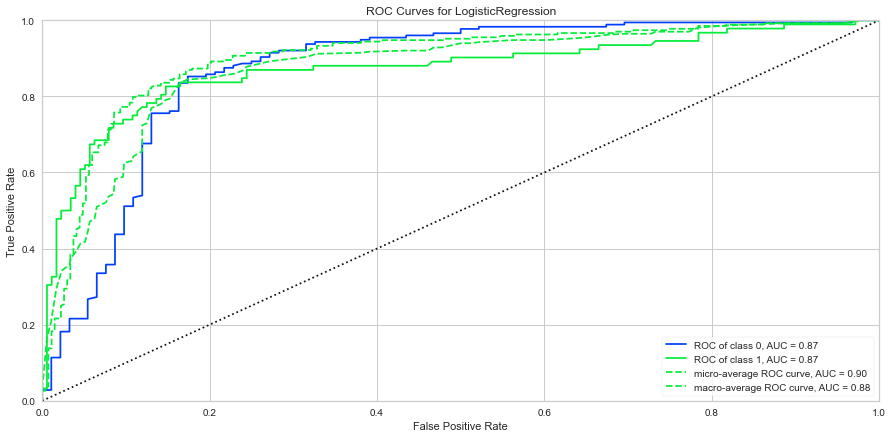

In [54]:
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()
